In [1]:
import os
os.chdir(os.path.expanduser("~/Projects/zimmer"))
import pickle

import numpy as np
np.random.seed(1234)

import matplotlib.pyplot as plt
plt.ion()

from tqdm import tqdm
from functools import partial

from zimmer.io import load_kato_data
import zimmer.plotting as zplt

from ssm.models import HMM, SLDS, LDS
from ssm.util import find_permutation, compute_state_overlap
from ssm.preprocessing import pca_with_imputation, trend_filter

In [2]:
# Load the data
ys, ms, z_trues, z_true_key, neuron_names = load_kato_data(include_unnamed=False, signal="dff")
ys = [trend_filter(y) for y in ys]

K_true = len(z_true_key)
N = ys[0].shape[1]
W = len(ys)
Ts = [y.shape[0] for y in ys]

Only including named neurons.
59 neurons across all 5 worms


In [3]:
# Ds = np.arange(2, 21, step=2)
Ds = [3]

In [4]:
N_iters = 1000
ldss = []
elboss = []
xss = []
for D in Ds:
    print("Fitting LDS with {} latent dimensions".format(D))
    lds = LDS(N, D, emissions="gaussian_nn")
    elbos, variational_params = lds.fit(ys, masks=ms, optimizer="adam_with_convergence_check", print_intvl=1)
    xs = [vp[0] for vp in variational_params]
    
    # Save results
    ldss.append(lds)
    elboss.append(elbos)
    xss.append(xs)

Fitting LDS with 3 latent dimensions
Initializing with an ARHMM using 25 steps of EM.
Done
Iteration 0.  ELBO: -646718452.1
Iteration 1.  ELBO: -641392538.9
Iteration 2.  ELBO: -638337415.4
Iteration 3.  ELBO: -630723623.0
Iteration 4.  ELBO: -627174913.3
Iteration 5.  ELBO: -620393743.8
Iteration 6.  ELBO: -616535240.9
Iteration 7.  ELBO: -609032721.1
Iteration 8.  ELBO: -605639442.5
Iteration 9.  ELBO: -599555160.7
Iteration 10.  ELBO: -597026509.3
Iteration 11.  ELBO: -591375844.0
Iteration 12.  ELBO: -587022782.5
Iteration 13.  ELBO: -581224997.3
Iteration 14.  ELBO: -577251318.8
Iteration 15.  ELBO: -572430387.8
Iteration 16.  ELBO: -566882759.8
Iteration 17.  ELBO: -560708307.1
Iteration 18.  ELBO: -557435208.1
Iteration 19.  ELBO: -554166430.2
Iteration 20.  ELBO: -547286733.9
Iteration 21.  ELBO: -544568382.4
Iteration 22.  ELBO: -539626552.7
Iteration 23.  ELBO: -538078830.9
Iteration 24.  ELBO: -528792109.6
Iteration 25.  ELBO: -527228596.1
Iteration 26.  ELBO: -520681921.6
I

Iteration 235.  ELBO: -108295578.5
Iteration 236.  ELBO: -107339895.6
Iteration 237.  ELBO: -106883900.3
Iteration 238.  ELBO: -105993196.1
Iteration 239.  ELBO: -105741166.5
Iteration 240.  ELBO: -104830618.7
Iteration 241.  ELBO: -103677545.2
Iteration 242.  ELBO: -103667787.4
Iteration 243.  ELBO: -102779572.1
Iteration 244.  ELBO: -102153834.8
Iteration 245.  ELBO: -101954316.3
Iteration 246.  ELBO: -100945905.9
Iteration 247.  ELBO: -100704989.7
Iteration 248.  ELBO: -99431897.4
Iteration 249.  ELBO: -98988983.3
Iteration 250.  ELBO: -99145033.1
Iteration 251.  ELBO: -98124859.6
Iteration 252.  ELBO: -97290978.4
Iteration 253.  ELBO: -97115799.2
Iteration 254.  ELBO: -96550436.2
Iteration 255.  ELBO: -95619180.0
Iteration 256.  ELBO: -94952205.7
Iteration 257.  ELBO: -94721506.3
Iteration 258.  ELBO: -94530637.2
Iteration 259.  ELBO: -93179222.6
Iteration 260.  ELBO: -92871585.5
Iteration 261.  ELBO: -92525783.4
Iteration 262.  ELBO: -91697358.3
Iteration 263.  ELBO: -90840585.2
I

Iteration 476.  ELBO: -37946932.5
Iteration 477.  ELBO: -37808808.2
Iteration 478.  ELBO: -37799368.2
Iteration 479.  ELBO: -37800497.1
Iteration 480.  ELBO: -37730506.2
Iteration 481.  ELBO: -37626050.7
Iteration 482.  ELBO: -37327155.3
Iteration 483.  ELBO: -37282624.6
Iteration 484.  ELBO: -37010232.4
Iteration 485.  ELBO: -37112998.0
Iteration 486.  ELBO: -36934075.8
Iteration 487.  ELBO: -37045445.8
Iteration 488.  ELBO: -36696719.2
Iteration 489.  ELBO: -36625595.1
Iteration 490.  ELBO: -36359714.7
Iteration 491.  ELBO: -36466683.2
Iteration 492.  ELBO: -36456567.1
Iteration 493.  ELBO: -36322335.3
Iteration 494.  ELBO: -36366406.6
Iteration 495.  ELBO: -36161194.4
Iteration 496.  ELBO: -36149215.1
Iteration 497.  ELBO: -35936877.1
Iteration 498.  ELBO: -35799228.5
Iteration 499.  ELBO: -35860966.3
Iteration 500.  ELBO: -35740753.8
Iteration 501.  ELBO: -35666098.3
Iteration 502.  ELBO: -35489745.9
Iteration 503.  ELBO: -35466180.7
Iteration 504.  ELBO: -35192483.6
Iteration 505.

Iteration 717.  ELBO: -22897724.2
Iteration 718.  ELBO: -22752567.1
Iteration 719.  ELBO: -22720640.2
Iteration 720.  ELBO: -22967558.7
Iteration 721.  ELBO: -22444668.8
Iteration 722.  ELBO: -22540302.1
Iteration 723.  ELBO: -22636386.9
Iteration 724.  ELBO: -22698657.3
Iteration 725.  ELBO: -22381591.7
Iteration 726.  ELBO: -22417149.2
Iteration 727.  ELBO: -22496429.4
Iteration 728.  ELBO: -22301793.5
Iteration 729.  ELBO: -22460766.6
Iteration 730.  ELBO: -22293067.2
Iteration 731.  ELBO: -22223576.4
Iteration 732.  ELBO: -22290707.2
Iteration 733.  ELBO: -22389021.2
Iteration 734.  ELBO: -22051783.3
Iteration 735.  ELBO: -22111416.4
Iteration 736.  ELBO: -22039791.0
Iteration 737.  ELBO: -22098325.0
Iteration 738.  ELBO: -21992533.6
Iteration 739.  ELBO: -22007864.1
Iteration 740.  ELBO: -21726661.4
Iteration 741.  ELBO: -22052464.1
Iteration 742.  ELBO: -21816006.5
Iteration 743.  ELBO: -21743893.8
Iteration 744.  ELBO: -22004711.1
Iteration 745.  ELBO: -21414436.2
Iteration 746.

Iteration 958.  ELBO: -15154453.1
Iteration 959.  ELBO: -15373211.5
Iteration 960.  ELBO: -15204838.0
Iteration 961.  ELBO: -15171207.9
Iteration 962.  ELBO: -15124244.6
Iteration 963.  ELBO: -14981271.9
Iteration 964.  ELBO: -15231112.2
Iteration 965.  ELBO: -15172852.9
Iteration 966.  ELBO: -15201004.6
Iteration 967.  ELBO: -15134538.1
Iteration 968.  ELBO: -15012909.5
Iteration 969.  ELBO: -14985077.0
Iteration 970.  ELBO: -14902713.6
Iteration 971.  ELBO: -14927182.9
Iteration 972.  ELBO: -15008401.6
Iteration 973.  ELBO: -14816835.7
Iteration 974.  ELBO: -14809710.1
Iteration 975.  ELBO: -14815811.3
Iteration 976.  ELBO: -14695765.9
Iteration 977.  ELBO: -14819527.8
Iteration 978.  ELBO: -14828426.9
Iteration 979.  ELBO: -14739240.7
Iteration 980.  ELBO: -14708296.8
Iteration 981.  ELBO: -14731914.2
Iteration 982.  ELBO: -14757471.4
Iteration 983.  ELBO: -14668998.6
Iteration 984.  ELBO: -14501211.8
Iteration 985.  ELBO: -14721033.0
Iteration 986.  ELBO: -14488643.0
Iteration 987.

Iteration 1194.  ELBO: -10671480.0
Iteration 1195.  ELBO: -10629732.5
Iteration 1196.  ELBO: -10556011.6
Iteration 1197.  ELBO: -10605367.6
Iteration 1198.  ELBO: -10573429.3
Iteration 1199.  ELBO: -10593525.1
Iteration 1200.  ELBO: -10502475.4
Iteration 1201.  ELBO: -10573826.7
Iteration 1202.  ELBO: -10480276.7
Iteration 1203.  ELBO: -10494360.6
Iteration 1204.  ELBO: -10539606.2
Iteration 1205.  ELBO: -10427996.6
Iteration 1206.  ELBO: -10587081.3
Iteration 1207.  ELBO: -10288561.5
Iteration 1208.  ELBO: -10409187.5
Iteration 1209.  ELBO: -10366554.1
Iteration 1210.  ELBO: -10329127.2
Iteration 1211.  ELBO: -10359136.6
Iteration 1212.  ELBO: -10407614.8
Iteration 1213.  ELBO: -10301410.0
Iteration 1214.  ELBO: -10407453.9
Iteration 1215.  ELBO: -10353508.8
Iteration 1216.  ELBO: -10251159.5
Iteration 1217.  ELBO: -10229124.5
Iteration 1218.  ELBO: -10305865.5
Iteration 1219.  ELBO: -10238600.8
Iteration 1220.  ELBO: -10230708.3
Iteration 1221.  ELBO: -10201396.5
Iteration 1222.  ELB

Iteration 1434.  ELBO: -7524453.7
Iteration 1435.  ELBO: -7538017.9
Iteration 1436.  ELBO: -7555376.7
Iteration 1437.  ELBO: -7499117.2
Iteration 1438.  ELBO: -7499031.8
Iteration 1439.  ELBO: -7456032.7
Iteration 1440.  ELBO: -7470311.4
Iteration 1441.  ELBO: -7460600.6
Iteration 1442.  ELBO: -7421167.3
Iteration 1443.  ELBO: -7395095.8
Iteration 1444.  ELBO: -7480091.6
Iteration 1445.  ELBO: -7395481.6
Iteration 1446.  ELBO: -7494752.1
Iteration 1447.  ELBO: -7406640.3
Iteration 1448.  ELBO: -7387549.1
Iteration 1449.  ELBO: -7411316.4
Iteration 1450.  ELBO: -7428962.1
Iteration 1451.  ELBO: -7375086.5
Iteration 1452.  ELBO: -7312894.0
Iteration 1453.  ELBO: -7372589.8
Iteration 1454.  ELBO: -7367868.2
Iteration 1455.  ELBO: -7333620.4
Iteration 1456.  ELBO: -7307825.5
Iteration 1457.  ELBO: -7448861.5
Iteration 1458.  ELBO: -7325886.7
Iteration 1459.  ELBO: -7252098.2
Iteration 1460.  ELBO: -7311583.0
Iteration 1461.  ELBO: -7238729.8
Iteration 1462.  ELBO: -7232031.9
Iteration 1463

Iteration 1675.  ELBO: -5468486.3
Iteration 1676.  ELBO: -5496225.5
Iteration 1677.  ELBO: -5415865.9
Iteration 1678.  ELBO: -5468956.8
Iteration 1679.  ELBO: -5421765.7
Iteration 1680.  ELBO: -5455325.8
Iteration 1681.  ELBO: -5379952.8
Iteration 1682.  ELBO: -5436409.4
Iteration 1683.  ELBO: -5403502.8
Iteration 1684.  ELBO: -5378871.0
Iteration 1685.  ELBO: -5373828.5
Iteration 1686.  ELBO: -5412694.4
Iteration 1687.  ELBO: -5365092.6
Iteration 1688.  ELBO: -5381592.2
Iteration 1689.  ELBO: -5358627.5
Iteration 1690.  ELBO: -5384789.2
Iteration 1691.  ELBO: -5372348.8
Iteration 1692.  ELBO: -5331909.5
Iteration 1693.  ELBO: -5298415.3
Iteration 1694.  ELBO: -5344836.1
Iteration 1695.  ELBO: -5387311.3
Iteration 1696.  ELBO: -5364088.1
Iteration 1697.  ELBO: -5304104.5
Iteration 1698.  ELBO: -5306539.4
Iteration 1699.  ELBO: -5251266.2
Iteration 1700.  ELBO: -5278362.8
Iteration 1701.  ELBO: -5288340.3
Iteration 1702.  ELBO: -5276775.8
Iteration 1703.  ELBO: -5196267.5
Iteration 1704

Iteration 1916.  ELBO: -4018864.7
Iteration 1917.  ELBO: -4030335.7
Iteration 1918.  ELBO: -4021154.7
Iteration 1919.  ELBO: -3975392.5
Iteration 1920.  ELBO: -4002048.2
Iteration 1921.  ELBO: -3991073.2
Iteration 1922.  ELBO: -3994896.8
Iteration 1923.  ELBO: -4000208.8
Iteration 1924.  ELBO: -3972772.1
Iteration 1925.  ELBO: -4012745.5
Iteration 1926.  ELBO: -3958053.4
Iteration 1927.  ELBO: -3986990.8
Iteration 1928.  ELBO: -3963595.9
Iteration 1929.  ELBO: -3963411.1
Iteration 1930.  ELBO: -3939093.5
Iteration 1931.  ELBO: -3979468.6
Iteration 1932.  ELBO: -3957170.8
Iteration 1933.  ELBO: -3936007.7
Iteration 1934.  ELBO: -3971414.5
Iteration 1935.  ELBO: -3945185.0
Iteration 1936.  ELBO: -3913701.5
Iteration 1937.  ELBO: -3935753.9
Iteration 1938.  ELBO: -3925391.3
Iteration 1939.  ELBO: -3922812.9
Iteration 1940.  ELBO: -3924217.1
Iteration 1941.  ELBO: -3950061.1
Iteration 1942.  ELBO: -3890090.3
Iteration 1943.  ELBO: -3901019.9
Iteration 1944.  ELBO: -3876532.3
Iteration 1945

Iteration 2157.  ELBO: -3062572.0
Iteration 2158.  ELBO: -3002194.2
Iteration 2159.  ELBO: -2989564.1
Iteration 2160.  ELBO: -3008654.1
Iteration 2161.  ELBO: -3018546.9
Iteration 2162.  ELBO: -3020348.3
Iteration 2163.  ELBO: -3019800.3
Iteration 2164.  ELBO: -3032320.0
Iteration 2165.  ELBO: -2983832.8
Iteration 2166.  ELBO: -2998405.9
Iteration 2167.  ELBO: -2955604.0
Iteration 2168.  ELBO: -3013829.3
Iteration 2169.  ELBO: -2957518.1
Iteration 2170.  ELBO: -3014843.0
Iteration 2171.  ELBO: -2953365.1
Iteration 2172.  ELBO: -2985217.5
Iteration 2173.  ELBO: -2956085.6
Iteration 2174.  ELBO: -2968489.7
Iteration 2175.  ELBO: -2961888.0
Iteration 2176.  ELBO: -2987349.9
Iteration 2177.  ELBO: -2933120.3
Iteration 2178.  ELBO: -2932739.2
Iteration 2179.  ELBO: -2977777.8
Iteration 2180.  ELBO: -2944946.3
Iteration 2181.  ELBO: -2958245.3
Iteration 2182.  ELBO: -2898044.8
Iteration 2183.  ELBO: -2924374.7
Iteration 2184.  ELBO: -2921352.8
Iteration 2185.  ELBO: -2913831.7
Iteration 2186

Iteration 2398.  ELBO: -2349923.0
Iteration 2399.  ELBO: -2345879.4
Iteration 2400.  ELBO: -2339156.5
Iteration 2401.  ELBO: -2360441.1
Iteration 2402.  ELBO: -2332887.3
Iteration 2403.  ELBO: -2318870.2
Iteration 2404.  ELBO: -2325011.0
Iteration 2405.  ELBO: -2317117.9
Iteration 2406.  ELBO: -2326659.7
Iteration 2407.  ELBO: -2350394.5
Iteration 2408.  ELBO: -2317604.1
Iteration 2409.  ELBO: -2308972.6
Iteration 2410.  ELBO: -2326744.1
Iteration 2411.  ELBO: -2321364.8
Iteration 2412.  ELBO: -2291323.6
Iteration 2413.  ELBO: -2299983.5
Iteration 2414.  ELBO: -2293202.5
Iteration 2415.  ELBO: -2313961.3
Iteration 2416.  ELBO: -2290338.7
Iteration 2417.  ELBO: -2292001.3
Iteration 2418.  ELBO: -2287676.0
Iteration 2419.  ELBO: -2297091.1
Iteration 2420.  ELBO: -2285723.1
Iteration 2421.  ELBO: -2270058.0
Iteration 2422.  ELBO: -2283071.3
Iteration 2423.  ELBO: -2283198.5
Iteration 2424.  ELBO: -2272401.8
Iteration 2425.  ELBO: -2284789.4
Iteration 2426.  ELBO: -2275270.1
Iteration 2427

Iteration 2639.  ELBO: -1875909.7
Iteration 2640.  ELBO: -1857435.4
Iteration 2641.  ELBO: -1854223.5
Iteration 2642.  ELBO: -1859951.0
Iteration 2643.  ELBO: -1855125.7
Iteration 2644.  ELBO: -1845755.7
Iteration 2645.  ELBO: -1867360.3
Iteration 2646.  ELBO: -1846067.5
Iteration 2647.  ELBO: -1828711.5
Iteration 2648.  ELBO: -1838348.0
Iteration 2649.  ELBO: -1859475.4
Iteration 2650.  ELBO: -1846251.7
Iteration 2651.  ELBO: -1831800.4
Iteration 2652.  ELBO: -1835610.6
Iteration 2653.  ELBO: -1855048.8
Iteration 2654.  ELBO: -1845827.0
Iteration 2655.  ELBO: -1841362.6
Iteration 2656.  ELBO: -1836282.7
Iteration 2657.  ELBO: -1851803.4
Iteration 2658.  ELBO: -1830587.2
Iteration 2659.  ELBO: -1826799.6
Iteration 2660.  ELBO: -1838903.2
Iteration 2661.  ELBO: -1825113.1
Iteration 2662.  ELBO: -1842600.5
Iteration 2663.  ELBO: -1827129.7
Iteration 2664.  ELBO: -1821429.7
Iteration 2665.  ELBO: -1819544.1
Iteration 2666.  ELBO: -1829209.0
Iteration 2667.  ELBO: -1816911.4
Iteration 2668

Iteration 2880.  ELBO: -1554309.8
Iteration 2881.  ELBO: -1527221.9
Iteration 2882.  ELBO: -1541331.3
Iteration 2883.  ELBO: -1524215.9
Iteration 2884.  ELBO: -1521143.0
Iteration 2885.  ELBO: -1527069.4
Iteration 2886.  ELBO: -1527736.2
Iteration 2887.  ELBO: -1532154.6
Iteration 2888.  ELBO: -1505468.8
Iteration 2889.  ELBO: -1513463.3
Iteration 2890.  ELBO: -1502550.7
Iteration 2891.  ELBO: -1511873.8
Iteration 2892.  ELBO: -1502773.3
Iteration 2893.  ELBO: -1511564.0
Iteration 2894.  ELBO: -1507065.3
Iteration 2895.  ELBO: -1508119.7
Iteration 2896.  ELBO: -1499963.4
Iteration 2897.  ELBO: -1501182.1
Iteration 2898.  ELBO: -1494376.2
Iteration 2899.  ELBO: -1513651.1
Iteration 2900.  ELBO: -1495530.2
Iteration 2901.  ELBO: -1509439.7
Iteration 2902.  ELBO: -1499827.9
Iteration 2903.  ELBO: -1508069.2
Iteration 2904.  ELBO: -1507510.9
Iteration 2905.  ELBO: -1495285.3
Iteration 2906.  ELBO: -1493004.4
Iteration 2907.  ELBO: -1498927.6
Iteration 2908.  ELBO: -1483587.4
Iteration 2909

Iteration 3121.  ELBO: -1271197.9
Iteration 3122.  ELBO: -1276607.6
Iteration 3123.  ELBO: -1288662.1
Iteration 3124.  ELBO: -1288941.2
Iteration 3125.  ELBO: -1278583.2
Iteration 3126.  ELBO: -1278079.4
Iteration 3127.  ELBO: -1266029.4
Iteration 3128.  ELBO: -1281127.6
Iteration 3129.  ELBO: -1269592.8
Iteration 3130.  ELBO: -1261337.9
Iteration 3131.  ELBO: -1279572.0
Iteration 3132.  ELBO: -1281327.3
Iteration 3133.  ELBO: -1271289.0
Iteration 3134.  ELBO: -1262032.6
Iteration 3135.  ELBO: -1273396.4
Iteration 3136.  ELBO: -1263459.0
Iteration 3137.  ELBO: -1277453.8
Iteration 3138.  ELBO: -1264181.4
Iteration 3139.  ELBO: -1284050.4
Iteration 3140.  ELBO: -1265874.7
Iteration 3141.  ELBO: -1267699.4
Iteration 3142.  ELBO: -1275303.2
Iteration 3143.  ELBO: -1259741.3
Iteration 3144.  ELBO: -1266158.9
Iteration 3145.  ELBO: -1252011.9
Iteration 3146.  ELBO: -1257585.4
Iteration 3147.  ELBO: -1252587.9
Iteration 3148.  ELBO: -1256749.2
Iteration 3149.  ELBO: -1256161.9
Iteration 3150

Iteration 3362.  ELBO: -1091189.4
Iteration 3363.  ELBO: -1096771.7
Iteration 3364.  ELBO: -1104877.3
Iteration 3365.  ELBO: -1097219.7
Iteration 3366.  ELBO: -1103017.5
Iteration 3367.  ELBO: -1097970.5
Iteration 3368.  ELBO: -1099437.1
Iteration 3369.  ELBO: -1103438.8
Iteration 3370.  ELBO: -1101446.7
Iteration 3371.  ELBO: -1100952.8
Iteration 3372.  ELBO: -1095650.3
Iteration 3373.  ELBO: -1093320.2
Iteration 3374.  ELBO: -1094385.3
Iteration 3375.  ELBO: -1099096.8
Iteration 3376.  ELBO: -1098663.5
Iteration 3377.  ELBO: -1084492.6
Iteration 3378.  ELBO: -1089589.6
Iteration 3379.  ELBO: -1098114.0
Iteration 3380.  ELBO: -1090568.9
Iteration 3381.  ELBO: -1089383.1
Iteration 3382.  ELBO: -1100863.8
Iteration 3383.  ELBO: -1086546.2
Iteration 3384.  ELBO: -1082144.4
Iteration 3385.  ELBO: -1086834.0
Iteration 3386.  ELBO: -1086916.4
Iteration 3387.  ELBO: -1080740.0
Iteration 3388.  ELBO: -1100218.5
Iteration 3389.  ELBO: -1078265.6
Iteration 3390.  ELBO: -1081612.9
Iteration 3391

Iteration 3605.  ELBO: -971657.5
Iteration 3606.  ELBO: -966338.6
Iteration 3607.  ELBO: -967599.7
Iteration 3608.  ELBO: -963840.4
Iteration 3609.  ELBO: -965703.6
Iteration 3610.  ELBO: -959743.9
Iteration 3611.  ELBO: -963294.7
Iteration 3612.  ELBO: -965683.2
Iteration 3613.  ELBO: -964589.6
Iteration 3614.  ELBO: -968065.4
Iteration 3615.  ELBO: -968295.9
Iteration 3616.  ELBO: -962805.0
Iteration 3617.  ELBO: -965613.7
Iteration 3618.  ELBO: -960813.4
Iteration 3619.  ELBO: -959712.9
Iteration 3620.  ELBO: -961925.2
Iteration 3621.  ELBO: -958813.2
Iteration 3622.  ELBO: -957572.0
Iteration 3623.  ELBO: -962795.7
Iteration 3624.  ELBO: -963208.7
Iteration 3625.  ELBO: -958463.1
Iteration 3626.  ELBO: -960163.9
Iteration 3627.  ELBO: -956523.9
Iteration 3628.  ELBO: -958448.4
Iteration 3629.  ELBO: -957602.7
Iteration 3630.  ELBO: -958561.0
Iteration 3631.  ELBO: -966183.7
Iteration 3632.  ELBO: -950773.3
Iteration 3633.  ELBO: -954050.4
Iteration 3634.  ELBO: -955331.7
Iteration 

Iteration 3854.  ELBO: -864465.9
Iteration 3855.  ELBO: -862146.5
Iteration 3856.  ELBO: -862651.1
Iteration 3857.  ELBO: -864445.3
Iteration 3858.  ELBO: -861755.9
Iteration 3859.  ELBO: -860522.3
Iteration 3860.  ELBO: -859576.8
Iteration 3861.  ELBO: -853702.7
Iteration 3862.  ELBO: -860324.7
Iteration 3863.  ELBO: -863254.8
Iteration 3864.  ELBO: -860684.5
Iteration 3865.  ELBO: -860984.3
Iteration 3866.  ELBO: -861726.7
Iteration 3867.  ELBO: -861334.3
Iteration 3868.  ELBO: -861742.8
Iteration 3869.  ELBO: -862985.9
Iteration 3870.  ELBO: -856811.8
Iteration 3871.  ELBO: -853652.1
Iteration 3872.  ELBO: -854225.1
Iteration 3873.  ELBO: -856750.2
Iteration 3874.  ELBO: -857588.0
Iteration 3875.  ELBO: -852625.2
Iteration 3876.  ELBO: -857109.4
Iteration 3877.  ELBO: -848520.2
Iteration 3878.  ELBO: -852136.3
Iteration 3879.  ELBO: -850000.6
Iteration 3880.  ELBO: -861065.4
Iteration 3881.  ELBO: -852214.1
Iteration 3882.  ELBO: -848251.8
Iteration 3883.  ELBO: -850148.9
Iteration 

Iteration 4103.  ELBO: -778357.5
Iteration 4104.  ELBO: -779047.6
Iteration 4105.  ELBO: -778958.7
Iteration 4106.  ELBO: -783591.3
Iteration 4107.  ELBO: -778491.2
Iteration 4108.  ELBO: -778130.2
Iteration 4109.  ELBO: -781558.9
Iteration 4110.  ELBO: -778634.3
Iteration 4111.  ELBO: -781041.0
Iteration 4112.  ELBO: -773051.5
Iteration 4113.  ELBO: -774207.3
Iteration 4114.  ELBO: -774504.7
Iteration 4115.  ELBO: -772070.6
Iteration 4116.  ELBO: -774966.7
Iteration 4117.  ELBO: -773109.8
Iteration 4118.  ELBO: -773541.2
Iteration 4119.  ELBO: -774275.1
Iteration 4120.  ELBO: -770026.2
Iteration 4121.  ELBO: -775540.6
Iteration 4122.  ELBO: -776466.8
Iteration 4123.  ELBO: -767679.4
Iteration 4124.  ELBO: -769914.5
Iteration 4125.  ELBO: -773707.5
Iteration 4126.  ELBO: -771380.5
Iteration 4127.  ELBO: -776579.0
Iteration 4128.  ELBO: -773798.5
Iteration 4129.  ELBO: -775972.1
Iteration 4130.  ELBO: -776655.1
Iteration 4131.  ELBO: -773136.0
Iteration 4132.  ELBO: -770395.4
Iteration 

Iteration 4352.  ELBO: -713568.4
Iteration 4353.  ELBO: -714274.6
Iteration 4354.  ELBO: -714555.0
Iteration 4355.  ELBO: -712124.2
Iteration 4356.  ELBO: -712962.9
Iteration 4357.  ELBO: -713334.7
Iteration 4358.  ELBO: -713851.2
Iteration 4359.  ELBO: -714816.4
Iteration 4360.  ELBO: -710416.9
Iteration 4361.  ELBO: -711733.2
Iteration 4362.  ELBO: -713555.6
Iteration 4363.  ELBO: -705881.8
Iteration 4364.  ELBO: -707311.7
Iteration 4365.  ELBO: -708277.6
Iteration 4366.  ELBO: -708326.4
Iteration 4367.  ELBO: -705590.7
Iteration 4368.  ELBO: -711832.1
Iteration 4369.  ELBO: -704084.3
Iteration 4370.  ELBO: -709748.3
Iteration 4371.  ELBO: -705781.6
Iteration 4372.  ELBO: -710286.8
Iteration 4373.  ELBO: -702647.5
Iteration 4374.  ELBO: -708467.4
Iteration 4375.  ELBO: -707877.7
Iteration 4376.  ELBO: -706695.8
Iteration 4377.  ELBO: -705191.9
Iteration 4378.  ELBO: -705512.6
Iteration 4379.  ELBO: -708814.6
Iteration 4380.  ELBO: -702666.8
Iteration 4381.  ELBO: -705376.3
Iteration 

Iteration 4601.  ELBO: -657118.6
Iteration 4602.  ELBO: -657949.7
Iteration 4603.  ELBO: -657172.8
Iteration 4604.  ELBO: -657722.1
Iteration 4605.  ELBO: -662115.5
Iteration 4606.  ELBO: -658655.4
Iteration 4607.  ELBO: -658550.6
Iteration 4608.  ELBO: -656668.3
Iteration 4609.  ELBO: -654250.4
Iteration 4610.  ELBO: -654763.7
Iteration 4611.  ELBO: -660004.9
Iteration 4612.  ELBO: -650857.1
Iteration 4613.  ELBO: -657568.9
Iteration 4614.  ELBO: -653000.0
Iteration 4615.  ELBO: -656750.4
Iteration 4616.  ELBO: -652609.7
Iteration 4617.  ELBO: -657235.9
Iteration 4618.  ELBO: -654217.1
Iteration 4619.  ELBO: -654053.5
Iteration 4620.  ELBO: -650880.8
Iteration 4621.  ELBO: -652003.0
Iteration 4622.  ELBO: -653661.4
Iteration 4623.  ELBO: -657306.5
Iteration 4624.  ELBO: -654084.5
Iteration 4625.  ELBO: -649479.9
Iteration 4626.  ELBO: -658339.3
Iteration 4627.  ELBO: -653107.6
Iteration 4628.  ELBO: -650885.5
Iteration 4629.  ELBO: -647880.6
Iteration 4630.  ELBO: -651167.0
Iteration 

Iteration 4849.  ELBO: -609196.2
Iteration 4850.  ELBO: -610100.4
Iteration 4851.  ELBO: -608684.5
Iteration 4852.  ELBO: -613115.2
Iteration 4853.  ELBO: -607588.8
Iteration 4854.  ELBO: -611376.1
Iteration 4855.  ELBO: -607480.1
Iteration 4856.  ELBO: -607841.6
Iteration 4857.  ELBO: -606912.5
Iteration 4858.  ELBO: -610513.4
Iteration 4859.  ELBO: -607779.2
Iteration 4860.  ELBO: -609555.6
Iteration 4861.  ELBO: -608172.6
Iteration 4862.  ELBO: -608882.8
Iteration 4863.  ELBO: -607871.1
Iteration 4864.  ELBO: -608490.6
Iteration 4865.  ELBO: -606887.9
Iteration 4866.  ELBO: -605794.5
Iteration 4867.  ELBO: -606221.0
Iteration 4868.  ELBO: -607592.9
Iteration 4869.  ELBO: -606165.1
Iteration 4870.  ELBO: -606444.6
Iteration 4871.  ELBO: -604452.8
Iteration 4872.  ELBO: -605267.0
Iteration 4873.  ELBO: -606569.6
Iteration 4874.  ELBO: -602679.9
Iteration 4875.  ELBO: -607883.8
Iteration 4876.  ELBO: -605852.8
Iteration 4877.  ELBO: -607319.0
Iteration 4878.  ELBO: -605271.3
Iteration 

Iteration 5098.  ELBO: -568566.6
Iteration 5099.  ELBO: -568087.7
Iteration 5100.  ELBO: -567644.5
Iteration 5101.  ELBO: -570534.4
Iteration 5102.  ELBO: -563625.0
Iteration 5103.  ELBO: -571406.9
Iteration 5104.  ELBO: -566297.6
Iteration 5105.  ELBO: -566706.6
Iteration 5106.  ELBO: -566173.3
Iteration 5107.  ELBO: -568515.3
Iteration 5108.  ELBO: -566135.8
Iteration 5109.  ELBO: -563559.5
Iteration 5110.  ELBO: -569777.9
Iteration 5111.  ELBO: -565154.9
Iteration 5112.  ELBO: -566968.0
Iteration 5113.  ELBO: -564104.2
Iteration 5114.  ELBO: -566738.1
Iteration 5115.  ELBO: -567316.4
Iteration 5116.  ELBO: -564027.7
Iteration 5117.  ELBO: -565340.5
Iteration 5118.  ELBO: -563893.7
Iteration 5119.  ELBO: -564698.1
Iteration 5120.  ELBO: -565744.4
Iteration 5121.  ELBO: -568915.0
Iteration 5122.  ELBO: -565363.1
Iteration 5123.  ELBO: -562817.5
Iteration 5124.  ELBO: -565764.0
Iteration 5125.  ELBO: -564613.3
Iteration 5126.  ELBO: -563733.1
Iteration 5127.  ELBO: -565415.7
Iteration 

Iteration 5347.  ELBO: -531482.8
Iteration 5348.  ELBO: -531516.9
Iteration 5349.  ELBO: -530671.5
Iteration 5350.  ELBO: -530671.6
Iteration 5351.  ELBO: -529531.4
Iteration 5352.  ELBO: -529324.6
Iteration 5353.  ELBO: -529559.8
Iteration 5354.  ELBO: -529936.3
Iteration 5355.  ELBO: -528123.3
Iteration 5356.  ELBO: -529114.2
Iteration 5357.  ELBO: -528760.2
Iteration 5358.  ELBO: -528793.6
Iteration 5359.  ELBO: -528276.2
Iteration 5360.  ELBO: -529555.4
Iteration 5361.  ELBO: -529977.7
Iteration 5362.  ELBO: -527539.6
Iteration 5363.  ELBO: -529961.5
Iteration 5364.  ELBO: -528356.8
Iteration 5365.  ELBO: -528408.3
Iteration 5366.  ELBO: -526932.7
Iteration 5367.  ELBO: -529246.2
Iteration 5368.  ELBO: -526438.6
Iteration 5369.  ELBO: -525758.8
Iteration 5370.  ELBO: -526718.2
Iteration 5371.  ELBO: -527509.8
Iteration 5372.  ELBO: -527654.6
Iteration 5373.  ELBO: -525761.8
Iteration 5374.  ELBO: -526270.3
Iteration 5375.  ELBO: -528060.0
Iteration 5376.  ELBO: -525927.9
Iteration 

Iteration 5596.  ELBO: -496542.7
Iteration 5597.  ELBO: -498783.2
Iteration 5598.  ELBO: -496805.2
Iteration 5599.  ELBO: -495024.7
Iteration 5600.  ELBO: -495149.9
Iteration 5601.  ELBO: -496198.8
Iteration 5602.  ELBO: -498084.5
Iteration 5603.  ELBO: -495759.0
Iteration 5604.  ELBO: -493775.0
Iteration 5605.  ELBO: -494615.3
Iteration 5606.  ELBO: -496807.7
Iteration 5607.  ELBO: -494777.4
Iteration 5608.  ELBO: -494722.5
Iteration 5609.  ELBO: -495749.9
Iteration 5610.  ELBO: -495786.6
Iteration 5611.  ELBO: -494433.4
Iteration 5612.  ELBO: -493956.7
Iteration 5613.  ELBO: -494810.0
Iteration 5614.  ELBO: -492963.3
Iteration 5615.  ELBO: -491737.3
Iteration 5616.  ELBO: -494838.1
Iteration 5617.  ELBO: -494884.2
Iteration 5618.  ELBO: -494532.4
Iteration 5619.  ELBO: -490424.9
Iteration 5620.  ELBO: -493536.6
Iteration 5621.  ELBO: -494540.4
Iteration 5622.  ELBO: -492855.3
Iteration 5623.  ELBO: -495744.4
Iteration 5624.  ELBO: -493170.7
Iteration 5625.  ELBO: -493255.7
Iteration 

Iteration 5845.  ELBO: -464674.6
Iteration 5846.  ELBO: -465071.6
Iteration 5847.  ELBO: -463543.0
Iteration 5848.  ELBO: -464591.7
Iteration 5849.  ELBO: -463225.5
Iteration 5850.  ELBO: -463985.2
Iteration 5851.  ELBO: -462031.2
Iteration 5852.  ELBO: -463975.1
Iteration 5853.  ELBO: -462025.1
Iteration 5854.  ELBO: -463508.1
Iteration 5855.  ELBO: -462178.5
Iteration 5856.  ELBO: -464144.6
Iteration 5857.  ELBO: -461323.9
Iteration 5858.  ELBO: -461070.8
Iteration 5859.  ELBO: -462842.7
Iteration 5860.  ELBO: -463454.7
Iteration 5861.  ELBO: -462136.0
Iteration 5862.  ELBO: -462847.4
Iteration 5863.  ELBO: -461822.9
Iteration 5864.  ELBO: -461351.7
Iteration 5865.  ELBO: -461574.6
Iteration 5866.  ELBO: -463163.7
Iteration 5867.  ELBO: -460335.7
Iteration 5868.  ELBO: -462698.1
Iteration 5869.  ELBO: -460980.9
Iteration 5870.  ELBO: -461075.0
Iteration 5871.  ELBO: -461616.5
Iteration 5872.  ELBO: -462908.1
Iteration 5873.  ELBO: -460478.1
Iteration 5874.  ELBO: -462157.1
Iteration 

Iteration 6094.  ELBO: -435025.4
Iteration 6095.  ELBO: -434970.9
Iteration 6096.  ELBO: -431932.6
Iteration 6097.  ELBO: -434554.2
Iteration 6098.  ELBO: -432923.2
Iteration 6099.  ELBO: -433298.5
Iteration 6100.  ELBO: -434112.3
Iteration 6101.  ELBO: -433093.9
Iteration 6102.  ELBO: -434125.1
Iteration 6103.  ELBO: -431983.7
Iteration 6104.  ELBO: -432687.5
Iteration 6105.  ELBO: -432846.1
Iteration 6106.  ELBO: -432459.7
Iteration 6107.  ELBO: -432163.6
Iteration 6108.  ELBO: -431501.2
Iteration 6109.  ELBO: -431662.7
Iteration 6110.  ELBO: -432598.3
Iteration 6111.  ELBO: -430051.7
Iteration 6112.  ELBO: -432783.1
Iteration 6113.  ELBO: -432651.2
Iteration 6114.  ELBO: -431181.9
Iteration 6115.  ELBO: -431450.5
Iteration 6116.  ELBO: -432026.9
Iteration 6117.  ELBO: -430952.6
Iteration 6118.  ELBO: -431148.2
Iteration 6119.  ELBO: -430227.5
Iteration 6120.  ELBO: -429081.9
Iteration 6121.  ELBO: -431008.0
Iteration 6122.  ELBO: -430378.7
Iteration 6123.  ELBO: -429493.2
Iteration 

Iteration 6343.  ELBO: -405436.1
Iteration 6344.  ELBO: -404133.3
Iteration 6345.  ELBO: -405513.4
Iteration 6346.  ELBO: -402990.9
Iteration 6347.  ELBO: -403140.9
Iteration 6348.  ELBO: -403470.2
Iteration 6349.  ELBO: -403867.3
Iteration 6350.  ELBO: -402724.0
Iteration 6351.  ELBO: -404649.2
Iteration 6352.  ELBO: -404385.9
Iteration 6353.  ELBO: -403533.1
Iteration 6354.  ELBO: -403912.1
Iteration 6355.  ELBO: -404418.4
Iteration 6356.  ELBO: -403175.3
Iteration 6357.  ELBO: -402089.2
Iteration 6358.  ELBO: -404357.1
Iteration 6359.  ELBO: -401391.5
Iteration 6360.  ELBO: -402808.0
Iteration 6361.  ELBO: -403058.4
Iteration 6362.  ELBO: -402700.2
Iteration 6363.  ELBO: -401861.7
Iteration 6364.  ELBO: -405320.3
Iteration 6365.  ELBO: -402287.9
Iteration 6366.  ELBO: -401395.7
Iteration 6367.  ELBO: -400012.0
Iteration 6368.  ELBO: -401355.8
Iteration 6369.  ELBO: -401861.4
Iteration 6370.  ELBO: -401350.6
Iteration 6371.  ELBO: -401243.8
Iteration 6372.  ELBO: -400688.0
Iteration 

Iteration 6592.  ELBO: -375632.8
Iteration 6593.  ELBO: -375077.7
Iteration 6594.  ELBO: -373739.6
Iteration 6595.  ELBO: -377210.1
Iteration 6596.  ELBO: -376520.4
Iteration 6597.  ELBO: -375242.1
Iteration 6598.  ELBO: -376089.5
Iteration 6599.  ELBO: -375248.6
Iteration 6600.  ELBO: -376296.3
Iteration 6601.  ELBO: -375012.5
Iteration 6602.  ELBO: -375735.7
Iteration 6603.  ELBO: -374722.8
Iteration 6604.  ELBO: -375830.8
Iteration 6605.  ELBO: -376312.6
Iteration 6606.  ELBO: -375534.9
Iteration 6607.  ELBO: -374489.9
Iteration 6608.  ELBO: -373775.1
Iteration 6609.  ELBO: -376776.2
Iteration 6610.  ELBO: -373668.6
Iteration 6611.  ELBO: -374864.9
Iteration 6612.  ELBO: -375046.8
Iteration 6613.  ELBO: -373918.5
Iteration 6614.  ELBO: -375744.8
Iteration 6615.  ELBO: -372644.2
Iteration 6616.  ELBO: -373173.2
Iteration 6617.  ELBO: -373404.0
Iteration 6618.  ELBO: -372363.2
Iteration 6619.  ELBO: -373181.5
Iteration 6620.  ELBO: -373308.5
Iteration 6621.  ELBO: -373239.8
Iteration 

Iteration 6841.  ELBO: -348036.0
Iteration 6842.  ELBO: -348191.3
Iteration 6843.  ELBO: -348335.7
Iteration 6844.  ELBO: -348613.9
Iteration 6845.  ELBO: -347909.7
Iteration 6846.  ELBO: -347185.6
Iteration 6847.  ELBO: -348743.3
Iteration 6848.  ELBO: -349098.7
Iteration 6849.  ELBO: -348645.1
Iteration 6850.  ELBO: -349652.2
Iteration 6851.  ELBO: -348713.0
Iteration 6852.  ELBO: -347936.4
Iteration 6853.  ELBO: -347580.2
Iteration 6854.  ELBO: -348454.1
Iteration 6855.  ELBO: -347656.1
Iteration 6856.  ELBO: -347238.9
Iteration 6857.  ELBO: -349000.1
Iteration 6858.  ELBO: -347437.8
Iteration 6859.  ELBO: -347177.6
Iteration 6860.  ELBO: -346992.9
Iteration 6861.  ELBO: -345482.2
Iteration 6862.  ELBO: -346283.4
Iteration 6863.  ELBO: -345655.2
Iteration 6864.  ELBO: -346646.0
Iteration 6865.  ELBO: -346598.2
Iteration 6866.  ELBO: -347235.3
Iteration 6867.  ELBO: -347533.3
Iteration 6868.  ELBO: -345270.5
Iteration 6869.  ELBO: -345788.9
Iteration 6870.  ELBO: -345915.0
Iteration 

Iteration 7090.  ELBO: -322094.9
Iteration 7091.  ELBO: -320509.6
Iteration 7092.  ELBO: -320765.5
Iteration 7093.  ELBO: -320458.2
Iteration 7094.  ELBO: -322767.0
Iteration 7095.  ELBO: -320610.8
Iteration 7096.  ELBO: -320965.0
Iteration 7097.  ELBO: -321154.5
Iteration 7098.  ELBO: -320710.4
Iteration 7099.  ELBO: -320966.1
Iteration 7100.  ELBO: -320086.3
Iteration 7101.  ELBO: -320254.9
Iteration 7102.  ELBO: -320105.3
Iteration 7103.  ELBO: -320539.2
Iteration 7104.  ELBO: -320376.5
Iteration 7105.  ELBO: -319234.6
Iteration 7106.  ELBO: -319886.3
Iteration 7107.  ELBO: -319900.0
Iteration 7108.  ELBO: -320060.2
Iteration 7109.  ELBO: -319768.2
Iteration 7110.  ELBO: -319460.0
Iteration 7111.  ELBO: -320507.6
Iteration 7112.  ELBO: -320038.8
Iteration 7113.  ELBO: -319717.1
Iteration 7114.  ELBO: -319261.1
Iteration 7115.  ELBO: -317826.1
Iteration 7116.  ELBO: -319179.4
Iteration 7117.  ELBO: -318150.9
Iteration 7118.  ELBO: -319261.7
Iteration 7119.  ELBO: -318424.9
Iteration 

Iteration 7339.  ELBO: -294944.9
Iteration 7340.  ELBO: -293858.2
Iteration 7341.  ELBO: -296526.9
Iteration 7342.  ELBO: -293543.2
Iteration 7343.  ELBO: -295342.8
Iteration 7344.  ELBO: -294092.2
Iteration 7345.  ELBO: -295041.8
Iteration 7346.  ELBO: -293712.7
Iteration 7347.  ELBO: -294323.6
Iteration 7348.  ELBO: -294084.2
Iteration 7349.  ELBO: -294030.8
Iteration 7350.  ELBO: -294692.8
Iteration 7351.  ELBO: -294153.4
Iteration 7352.  ELBO: -293101.3
Iteration 7353.  ELBO: -294657.8
Iteration 7354.  ELBO: -293077.4
Iteration 7355.  ELBO: -292309.4
Iteration 7356.  ELBO: -292306.8
Iteration 7357.  ELBO: -293482.3
Iteration 7358.  ELBO: -293829.5
Iteration 7359.  ELBO: -294350.1
Iteration 7360.  ELBO: -293362.8
Iteration 7361.  ELBO: -293034.1
Iteration 7362.  ELBO: -294564.7
Iteration 7363.  ELBO: -294315.3
Iteration 7364.  ELBO: -293886.6
Iteration 7365.  ELBO: -293744.2
Iteration 7366.  ELBO: -291564.2
Iteration 7367.  ELBO: -291081.4
Iteration 7368.  ELBO: -292172.9
Iteration 

Iteration 7588.  ELBO: -270030.0
Iteration 7589.  ELBO: -268135.8
Iteration 7590.  ELBO: -270379.3
Iteration 7591.  ELBO: -268210.0
Iteration 7592.  ELBO: -269671.7
Iteration 7593.  ELBO: -268651.7
Iteration 7594.  ELBO: -268406.7
Iteration 7595.  ELBO: -269323.8
Iteration 7596.  ELBO: -267813.3
Iteration 7597.  ELBO: -267727.0
Iteration 7598.  ELBO: -267262.4
Iteration 7599.  ELBO: -267650.1
Iteration 7600.  ELBO: -267829.5
Iteration 7601.  ELBO: -268666.2
Iteration 7602.  ELBO: -267271.6
Iteration 7603.  ELBO: -266913.7
Iteration 7604.  ELBO: -267544.7
Iteration 7605.  ELBO: -267579.4
Iteration 7606.  ELBO: -267571.8
Iteration 7607.  ELBO: -268212.6
Iteration 7608.  ELBO: -267159.5
Iteration 7609.  ELBO: -268066.9
Iteration 7610.  ELBO: -266420.1
Iteration 7611.  ELBO: -266291.1
Iteration 7612.  ELBO: -265934.5
Iteration 7613.  ELBO: -265584.3
Iteration 7614.  ELBO: -266694.4
Iteration 7615.  ELBO: -265277.8
Iteration 7616.  ELBO: -266762.3
Iteration 7617.  ELBO: -266561.1
Iteration 

Iteration 7837.  ELBO: -241183.6
Iteration 7838.  ELBO: -243972.0
Iteration 7839.  ELBO: -242172.7
Iteration 7840.  ELBO: -243082.3
Iteration 7841.  ELBO: -244175.5
Iteration 7842.  ELBO: -242609.1
Iteration 7843.  ELBO: -242246.2
Iteration 7844.  ELBO: -243322.6
Iteration 7845.  ELBO: -242719.6
Iteration 7846.  ELBO: -240626.4
Iteration 7847.  ELBO: -243109.8
Iteration 7848.  ELBO: -242803.0
Iteration 7849.  ELBO: -242347.1
Iteration 7850.  ELBO: -242190.7
Iteration 7851.  ELBO: -243148.7
Iteration 7852.  ELBO: -243241.8
Iteration 7853.  ELBO: -240609.8
Iteration 7854.  ELBO: -241403.7
Iteration 7855.  ELBO: -240779.7
Iteration 7856.  ELBO: -240649.7
Iteration 7857.  ELBO: -240885.0
Iteration 7858.  ELBO: -241044.6
Iteration 7859.  ELBO: -239918.1
Iteration 7860.  ELBO: -239727.9
Iteration 7861.  ELBO: -240816.5
Iteration 7862.  ELBO: -239712.5
Iteration 7863.  ELBO: -240308.5
Iteration 7864.  ELBO: -238087.9
Iteration 7865.  ELBO: -240304.9
Iteration 7866.  ELBO: -240158.0
Iteration 

Iteration 8086.  ELBO: -215101.0
Iteration 8087.  ELBO: -216913.8
Iteration 8088.  ELBO: -215521.4
Iteration 8089.  ELBO: -215601.8
Iteration 8090.  ELBO: -215940.1
Iteration 8091.  ELBO: -215643.8
Iteration 8092.  ELBO: -216981.1
Iteration 8093.  ELBO: -215208.5
Iteration 8094.  ELBO: -216818.8
Iteration 8095.  ELBO: -215577.9
Iteration 8096.  ELBO: -215333.4
Iteration 8097.  ELBO: -216530.1
Iteration 8098.  ELBO: -216951.3
Iteration 8099.  ELBO: -214801.5
Iteration 8100.  ELBO: -216928.0
Iteration 8101.  ELBO: -214192.7
Iteration 8102.  ELBO: -211856.2
Iteration 8103.  ELBO: -214362.5
Iteration 8104.  ELBO: -216494.5
Iteration 8105.  ELBO: -214669.4
Iteration 8106.  ELBO: -215373.1
Iteration 8107.  ELBO: -214870.0
Iteration 8108.  ELBO: -214464.3
Iteration 8109.  ELBO: -216124.9
Iteration 8110.  ELBO: -213699.3
Iteration 8111.  ELBO: -213923.7
Iteration 8112.  ELBO: -214711.2
Iteration 8113.  ELBO: -211349.0
Iteration 8114.  ELBO: -215389.0
Iteration 8115.  ELBO: -212191.1
Iteration 

Iteration 8335.  ELBO: -190368.7
Iteration 8336.  ELBO: -189471.3
Iteration 8337.  ELBO: -190703.9
Iteration 8338.  ELBO: -191094.8
Iteration 8339.  ELBO: -191073.9
Iteration 8340.  ELBO: -190289.6
Iteration 8341.  ELBO: -188249.2
Iteration 8342.  ELBO: -189657.4
Iteration 8343.  ELBO: -188896.3
Iteration 8344.  ELBO: -191003.2
Iteration 8345.  ELBO: -189203.9
Iteration 8346.  ELBO: -188691.3
Iteration 8347.  ELBO: -189281.7
Iteration 8348.  ELBO: -190396.8
Iteration 8349.  ELBO: -188080.9
Iteration 8350.  ELBO: -191267.5
Iteration 8351.  ELBO: -189825.5
Iteration 8352.  ELBO: -187976.0
Iteration 8353.  ELBO: -189122.4
Iteration 8354.  ELBO: -187371.1
Iteration 8355.  ELBO: -188332.1
Iteration 8356.  ELBO: -189671.7
Iteration 8357.  ELBO: -189871.2
Iteration 8358.  ELBO: -188468.3
Iteration 8359.  ELBO: -186286.8
Iteration 8360.  ELBO: -188552.7
Iteration 8361.  ELBO: -189481.6
Iteration 8362.  ELBO: -185458.5
Iteration 8363.  ELBO: -187837.8
Iteration 8364.  ELBO: -187733.3
Iteration 

Iteration 8584.  ELBO: -163658.0
Iteration 8585.  ELBO: -161617.3
Iteration 8586.  ELBO: -162513.5
Iteration 8587.  ELBO: -164096.2
Iteration 8588.  ELBO: -162136.3
Iteration 8589.  ELBO: -161683.6
Iteration 8590.  ELBO: -161534.7
Iteration 8591.  ELBO: -162538.9
Iteration 8592.  ELBO: -161254.5
Iteration 8593.  ELBO: -158341.4
Iteration 8594.  ELBO: -160096.8
Iteration 8595.  ELBO: -159967.2
Iteration 8596.  ELBO: -162364.2
Iteration 8597.  ELBO: -160410.9
Iteration 8598.  ELBO: -160839.2
Iteration 8599.  ELBO: -159791.8
Iteration 8600.  ELBO: -160990.3
Iteration 8601.  ELBO: -162821.1
Iteration 8602.  ELBO: -159753.7
Iteration 8603.  ELBO: -158414.8
Iteration 8604.  ELBO: -160293.5
Iteration 8605.  ELBO: -159570.0
Iteration 8606.  ELBO: -159731.3
Iteration 8607.  ELBO: -161205.0
Iteration 8608.  ELBO: -159252.9
Iteration 8609.  ELBO: -157756.6
Iteration 8610.  ELBO: -160028.3
Iteration 8611.  ELBO: -158482.0
Iteration 8612.  ELBO: -157550.7
Iteration 8613.  ELBO: -159044.7
Iteration 

Iteration 8832.  ELBO: -133457.6
Iteration 8833.  ELBO: -131622.2
Iteration 8834.  ELBO: -132603.0
Iteration 8835.  ELBO: -132864.6
Iteration 8836.  ELBO: -132004.3
Iteration 8837.  ELBO: -131752.2
Iteration 8838.  ELBO: -131704.7
Iteration 8839.  ELBO: -132047.6
Iteration 8840.  ELBO: -131423.5
Iteration 8841.  ELBO: -131408.1
Iteration 8842.  ELBO: -130907.0
Iteration 8843.  ELBO: -131331.9
Iteration 8844.  ELBO: -129863.4
Iteration 8845.  ELBO: -131853.2
Iteration 8846.  ELBO: -130486.0
Iteration 8847.  ELBO: -132614.1
Iteration 8848.  ELBO: -132316.7
Iteration 8849.  ELBO: -130416.3
Iteration 8850.  ELBO: -131813.3
Iteration 8851.  ELBO: -132221.3
Iteration 8852.  ELBO: -130751.3
Iteration 8853.  ELBO: -128982.0
Iteration 8854.  ELBO: -129693.3
Iteration 8855.  ELBO: -129555.6
Iteration 8856.  ELBO: -130083.6
Iteration 8857.  ELBO: -130813.2
Iteration 8858.  ELBO: -129658.2
Iteration 8859.  ELBO: -130383.6
Iteration 8860.  ELBO: -131304.1
Iteration 8861.  ELBO: -129788.0
Iteration 

Iteration 9081.  ELBO: -99854.2
Iteration 9082.  ELBO: -98240.9
Iteration 9083.  ELBO: -101008.8
Iteration 9084.  ELBO: -101618.7
Iteration 9085.  ELBO: -102261.7
Iteration 9086.  ELBO: -99435.3
Iteration 9087.  ELBO: -100551.3
Iteration 9088.  ELBO: -100283.2
Iteration 9089.  ELBO: -97790.9
Iteration 9090.  ELBO: -98660.1
Iteration 9091.  ELBO: -99824.0
Iteration 9092.  ELBO: -99085.3
Iteration 9093.  ELBO: -100513.6
Iteration 9094.  ELBO: -96974.8
Iteration 9095.  ELBO: -99818.9
Iteration 9096.  ELBO: -98995.4
Iteration 9097.  ELBO: -100842.6
Iteration 9098.  ELBO: -98359.5
Iteration 9099.  ELBO: -97584.2
Iteration 9100.  ELBO: -99543.1
Iteration 9101.  ELBO: -101474.7
Iteration 9102.  ELBO: -98895.5
Iteration 9103.  ELBO: -100141.0
Iteration 9104.  ELBO: -99505.0
Iteration 9105.  ELBO: -98622.3
Iteration 9106.  ELBO: -99330.8
Iteration 9107.  ELBO: -97394.0
Iteration 9108.  ELBO: -99554.2
Iteration 9109.  ELBO: -97679.5
Iteration 9110.  ELBO: -99070.5
Iteration 9111.  ELBO: -97936.6

Iteration 9337.  ELBO: -65963.7
Iteration 9338.  ELBO: -66033.4
Iteration 9339.  ELBO: -68809.0
Iteration 9340.  ELBO: -63018.9
Iteration 9341.  ELBO: -67904.5
Iteration 9342.  ELBO: -66470.5
Iteration 9343.  ELBO: -65687.5
Iteration 9344.  ELBO: -67112.7
Iteration 9345.  ELBO: -66049.7
Iteration 9346.  ELBO: -66645.0
Iteration 9347.  ELBO: -65595.4
Iteration 9348.  ELBO: -67412.1
Iteration 9349.  ELBO: -65996.7
Iteration 9350.  ELBO: -66637.2
Iteration 9351.  ELBO: -67313.7
Iteration 9352.  ELBO: -65571.5
Iteration 9353.  ELBO: -64142.2
Iteration 9354.  ELBO: -64421.0
Iteration 9355.  ELBO: -64244.4
Iteration 9356.  ELBO: -64177.2
Iteration 9357.  ELBO: -65136.3
Iteration 9358.  ELBO: -63330.5
Iteration 9359.  ELBO: -63156.9
Iteration 9360.  ELBO: -63805.2
Iteration 9361.  ELBO: -65030.0
Iteration 9362.  ELBO: -63217.8
Iteration 9363.  ELBO: -63946.4
Iteration 9364.  ELBO: -61944.1
Iteration 9365.  ELBO: -63545.7
Iteration 9366.  ELBO: -61725.3
Iteration 9367.  ELBO: -59773.0
Iteratio

Iteration 9594.  ELBO: -30940.6
Iteration 9595.  ELBO: -32516.1
Iteration 9596.  ELBO: -30390.7
Iteration 9597.  ELBO: -29197.4
Iteration 9598.  ELBO: -31033.5
Iteration 9599.  ELBO: -32085.2
Iteration 9600.  ELBO: -33511.5
Iteration 9601.  ELBO: -31652.3
Iteration 9602.  ELBO: -30400.1
Iteration 9603.  ELBO: -29592.6
Iteration 9604.  ELBO: -28910.2
Iteration 9605.  ELBO: -30469.6
Iteration 9606.  ELBO: -29410.6
Iteration 9607.  ELBO: -31557.3
Iteration 9608.  ELBO: -31591.9
Iteration 9609.  ELBO: -29460.2
Iteration 9610.  ELBO: -30525.4
Iteration 9611.  ELBO: -30946.0
Iteration 9612.  ELBO: -30835.3
Iteration 9613.  ELBO: -28282.2
Iteration 9614.  ELBO: -30231.4
Iteration 9615.  ELBO: -29290.1
Iteration 9616.  ELBO: -28932.2
Iteration 9617.  ELBO: -28888.8
Iteration 9618.  ELBO: -27831.7
Iteration 9619.  ELBO: -27084.0
Iteration 9620.  ELBO: -28634.5
Iteration 9621.  ELBO: -30911.9
Iteration 9622.  ELBO: -29755.1
Iteration 9623.  ELBO: -29247.0
Iteration 9624.  ELBO: -26506.8
Iteratio

Iteration 9854.  ELBO: 3984.7
Iteration 9855.  ELBO: 3808.8
Iteration 9856.  ELBO: 3473.7
Iteration 9857.  ELBO: 4208.4
Iteration 9858.  ELBO: 3574.1
Iteration 9859.  ELBO: 4676.1
Iteration 9860.  ELBO: 4499.3
Iteration 9861.  ELBO: 5061.6
Iteration 9862.  ELBO: 6020.4
Iteration 9863.  ELBO: 4159.0
Iteration 9864.  ELBO: 3930.2
Iteration 9865.  ELBO: 6046.0
Iteration 9866.  ELBO: 4659.8
Iteration 9867.  ELBO: 5993.6
Iteration 9868.  ELBO: 3920.3
Iteration 9869.  ELBO: 6147.8
Iteration 9870.  ELBO: 4255.9
Iteration 9871.  ELBO: 4056.7
Iteration 9872.  ELBO: 6355.3
Iteration 9873.  ELBO: 7055.0
Iteration 9874.  ELBO: 5981.4
Iteration 9875.  ELBO: 5943.6
Iteration 9876.  ELBO: 4691.9
Iteration 9877.  ELBO: 4125.1
Iteration 9878.  ELBO: 7360.5
Iteration 9879.  ELBO: 4920.2
Iteration 9880.  ELBO: 6035.2
Iteration 9881.  ELBO: 3737.6
Iteration 9882.  ELBO: 8040.6
Iteration 9883.  ELBO: 7208.5
Iteration 9884.  ELBO: 6217.1
Iteration 9885.  ELBO: 8849.8
Iteration 9886.  ELBO: 5772.7
Iteration 

/Users/scott/Projects/ssm/ssm/util.py:36: UserWarning: Adam failed to converge in 10000 iterations.
  warn("Adam failed to converge in {} iterations.".format(max_iters))


In [12]:
elbos, variational_params = lds.fit(ys, masks=ms, optimizer="adam_with_convergence_check", print_intvl=25, max_iters=10000)
xs = [vp[0] for vp in variational_params]

# Save results
ldss.append(lds)
elboss.append(elbos)
xss.append(xs)

Initializing with an ARHMM using 25 steps of EM.
Done
Iteration 0.  ELBO: -285305.6
Iteration 1.  ELBO: -256690.3
Iteration 2.  ELBO: -238366.7
Iteration 3.  ELBO: -218292.5
Iteration 4.  ELBO: -208159.5
Iteration 5.  ELBO: -199670.2
Iteration 6.  ELBO: -186288.1
Iteration 7.  ELBO: -185564.9
Iteration 8.  ELBO: -181566.3
Iteration 9.  ELBO: -176576.3
Iteration 10.  ELBO: -172215.4
Iteration 11.  ELBO: -168976.9
Iteration 12.  ELBO: -166705.8
Iteration 13.  ELBO: -164537.4
Iteration 14.  ELBO: -161379.1
Iteration 15.  ELBO: -165517.8
Iteration 16.  ELBO: -160621.6
Iteration 17.  ELBO: -156082.7
Iteration 18.  ELBO: -156381.1
Iteration 19.  ELBO: -154510.8
Iteration 20.  ELBO: -152535.6
Iteration 21.  ELBO: -152626.1
Iteration 22.  ELBO: -152179.6
Iteration 23.  ELBO: -150193.2
Iteration 24.  ELBO: -149096.0
Iteration 25.  ELBO: -148598.7
Iteration 26.  ELBO: -146730.2


KeyboardInterrupt: 

In [5]:
assert False

AssertionError: 

Text(0,0.5,'Final ELBO')

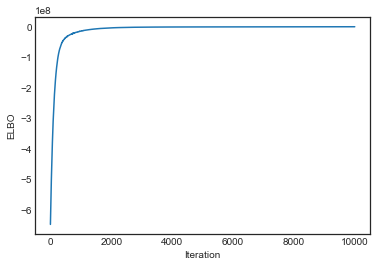

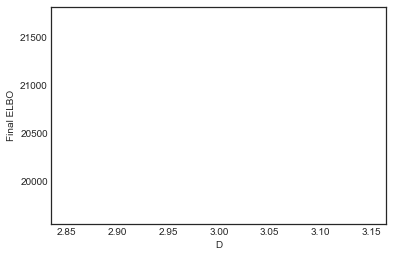

In [6]:
plt.figure()
plt.plot(np.array(elboss).T)
plt.xlabel("Iteration")
plt.ylabel("ELBO")

plt.figure()
plt.plot(Ds, np.array(elboss)[:,-1])
plt.xlabel("D")
plt.ylabel("Final ELBO")

Text(0.5,0.98,'Continuous Latent States (Zimmer Labels)')

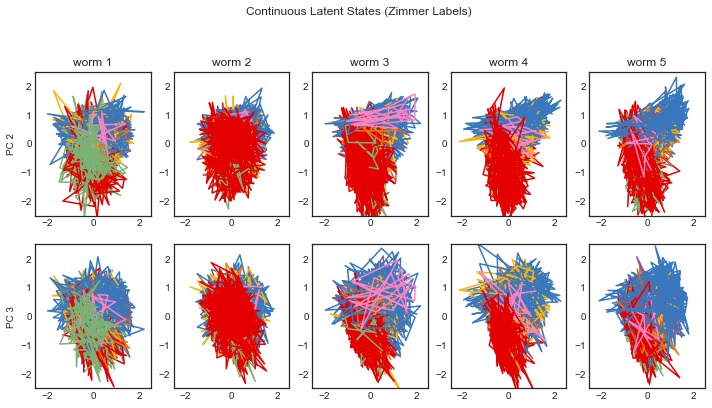

In [8]:
plt.figure(figsize=(12, 9))
for w, (x, z) in enumerate(zip(xs, z_trues)):
    ax = plt.subplot(3, W, w+1)
    zplt.plot_2d_continuous_states(x, z, xlims=(-2.5, 2.5), ylims=(-2.5, 2.5), inds=(0, 1), ax=ax)
    plt.ylabel("PC 2" if w == 0 else "")
    plt.title("worm {}".format(w+1))

    ax = plt.subplot(3, W, W+w+1)
    zplt.plot_2d_continuous_states(x, z, xlims=(-2.5, 2.5), ylims=(-2.5, 2.5), inds=(0, 2), ax=ax)
    plt.ylabel("PC 3" if w == 0 else "")

#     ax = plt.subplot(3, W, 2*W+w+1)
#     zplt.plot_2d_continuous_states(x, z, xlims=(-2.5, 2.5), ylims=(-2.5, 2.5), inds=(0, 3), ax=ax)
#     plt.xlabel("PC 1")
#     plt.ylabel("PC 4" if w == 0 else "")
    
plt.suptitle("Continuous Latent States (Zimmer Labels)")

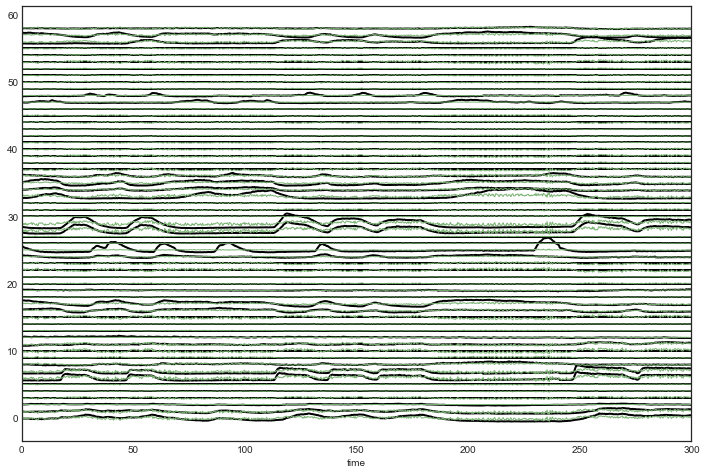

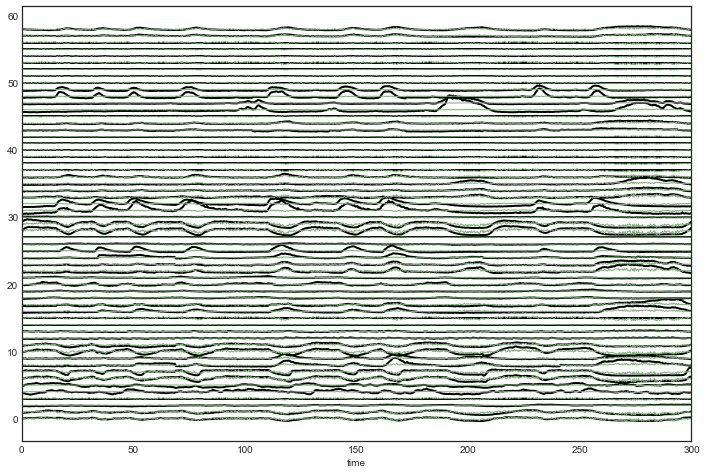

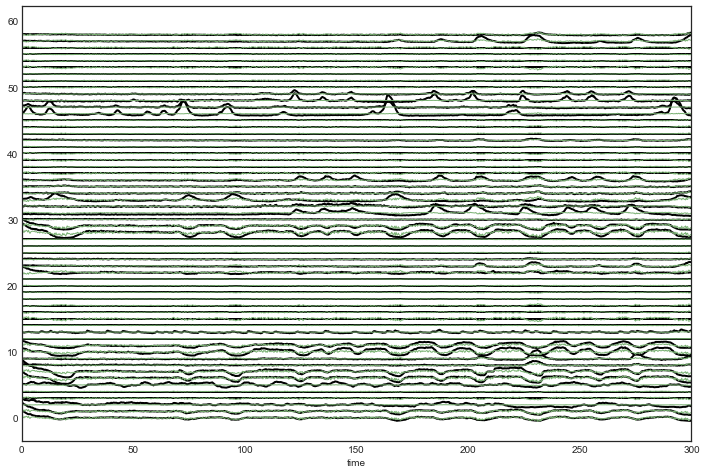

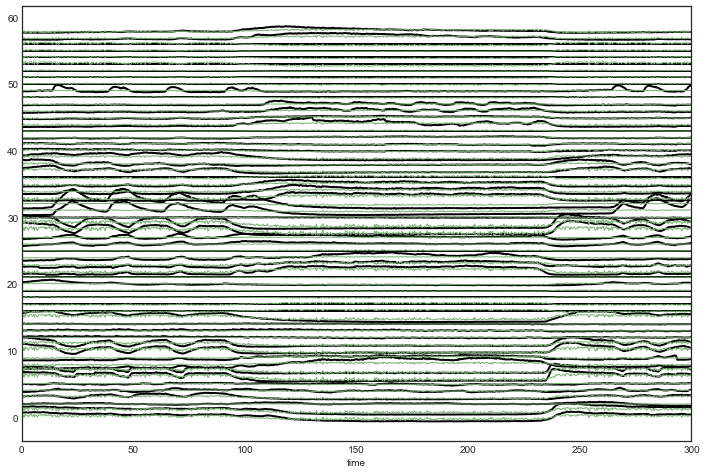

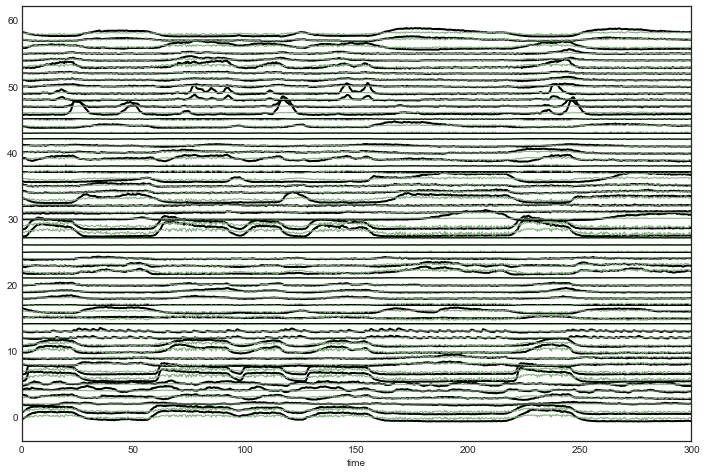

In [11]:
ysms = [lds.smooth(x, y) for x, y in zip(xs, ys)]

for w in range(W):
    plt.figure(figsize=(12, 8))
    plt.plot(np.arange(Ts[w]) / 3.0, ys[w] + np.arange(N), '-k', lw=2)
    plt.plot(np.arange(Ts[w]) / 3.0, ysms[w] + np.arange(N), '-', lw=1, color=zplt.default_colors[3])
    plt.xlim(0, 5 * 60)
    plt.xlabel("time")


A
[[0.06 0.11 0.09]
 [0.12 0.22 0.19]
 [0.1  0.18 0.14]]
b
[[ 0.09 -0.01  0.01]]
sigma
[[1.01005017 1.1502738  1.12749685]]


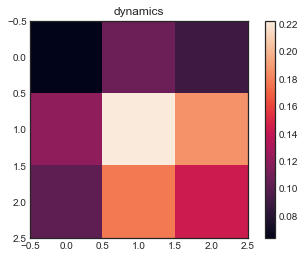

In [9]:
plt.imshow(lds.dynamics.As[0])
plt.title("dynamics")
plt.colorbar()

print("A")
print(lds.dynamics.As[0].round(2))
print("b")
print(lds.dynamics.bs.round(2))
print("sigma")
print(np.exp(lds.dynamics.inv_sigmas.round(2)))

In [10]:
C = lds.emissions.Cs[0]
plt.imshow(C, aspect=0.5)
plt.colorbar()
print(C.T.dot(C).round(2))
print(lds.emissions.ds[0].round(2))
print(np.exp(lds.emissions.inv_etas.round(2)))

AttributeError: 'GaussianNeuralNetworkEmissions' object has no attribute 'Cs'

# Fit a robust, recurrent, hierarchical ARHMM to the latent states